<a href="https://colab.research.google.com/github/OmdenaAI/omdena-osun-nigeria-improving-water-supply/blob/main/Osun_water_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!apt install python3-cartopy
!pip install cartopy
!pip install geoplot


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-cartopy is already the newest version (0.14.2+dfsg1-2build3).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [10]:
!pip install geopandas

import geopandas as gpd

import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np


In [11]:
!apt-get install libgeos++ libproj-dev
!pip install geoviews
import geoviews as gv
import geoviews.feature as gf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgeos-c1' for regex 'libgeos+'
Note, selecting 'libgeos-c1v5' for regex 'libgeos+'
Note, selecting 'libgeos-dev' for regex 'libgeos+'
Note, selecting 'libgeos-doc' for regex 'libgeos+'
Note, selecting 'libgeos-ruby1.8' for regex 'libgeos+'
Note, selecting 'libgeos++-dev' for regex 'libgeos+'
Note, selecting 'libgeos-3.6.2' for regex 'libgeos+'
Note, selecting 'ruby-geos' instead of 'libgeos-ruby1.8'
libgeos++-dev is already the newest version (3.6.2-1build2).
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-c1v5 is already the newest version (3.6.2-1build2).
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-doc is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
ruby-geos is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!wget https://github.com/OmdenaAI/omdena-osun-nigeria-improving-water-supply/blob/main/src/data/only%20osun.xlsx

--2022-01-06 14:21:31--  https://github.com/OmdenaAI/omdena-osun-nigeria-improving-water-supply/blob/main/src/data/only%20osun.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-01-06 14:21:31 ERROR 404: Not Found.



In [7]:
from google.colab import files
uploads = files.upload()

Saving only osun.xlsx to only osun (1).xlsx


In [12]:
state_osun = pd.read_excel("/content/only osun.xlsx")
state_osun

Unnamed: 0     id  ...  distance_in_km  population
0          22808  22809  ...        0.654399        1788
1          23478  23479  ...        1.055479        2800
2          24328  24329  ...        0.698792        2532
3          24359  24360  ...        1.101953        2225
4          24440  24441  ...        1.138428        2093
...          ...    ...  ...             ...         ...
5121       72265  72266  ...        0.469325        2619
5122       72275  72276  ...        0.235203        2661
5123       72288  72289  ...        0.711436        2624
5124       72334  72335  ...        0.596666        2197
5125       72344  72345  ...        0.527365        1917

[5126 rows x 21 columns]

In [9]:
%matplotlib inline

In [10]:

BoundBox = ((state_osun.longitude.min(),   state_osun.longitude.max(), state_osun.latitude.min(), state_osun.latitude.max()))     
BoundBox         

(4.0320038, 5.0550034, 7.060309, 8.0618983)

In [11]:
ruh_m = plt.imread('/content/map.png')

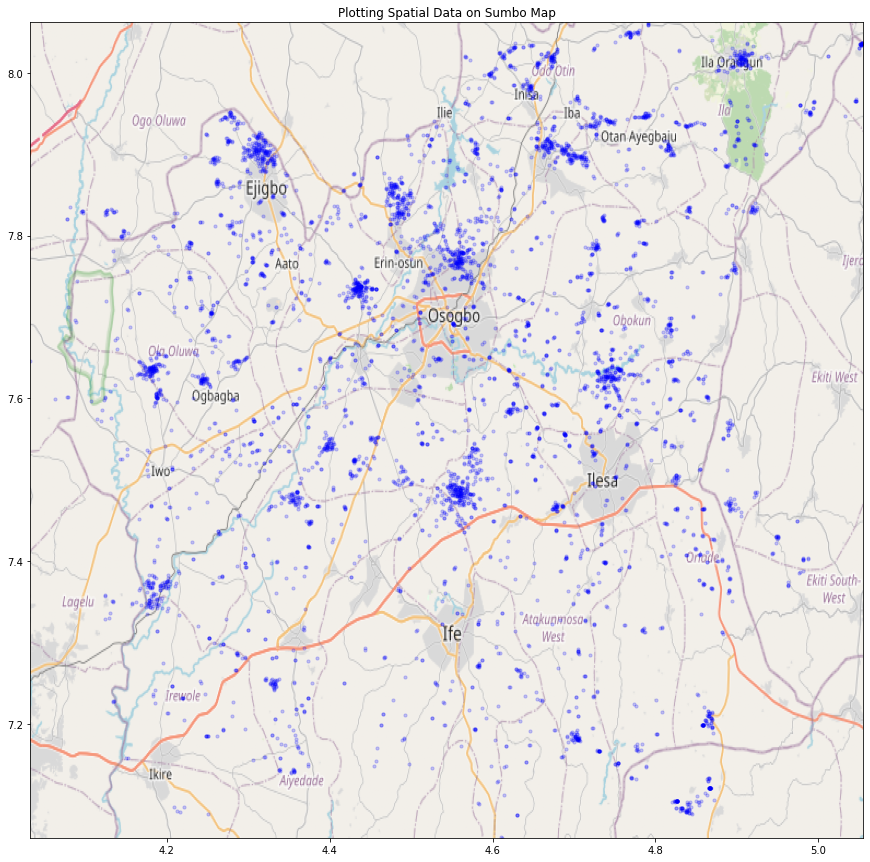

In [12]:
fig, ax = plt.subplots(figsize = (18,15))
ax.scatter(state_osun.longitude, state_osun.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Sumbo Map')
ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])
ax.imshow(ruh_m, zorder=0, extent = BoundBox, aspect= 'equal')

In [13]:
ruh = plt.imread('/content/map(1).png')

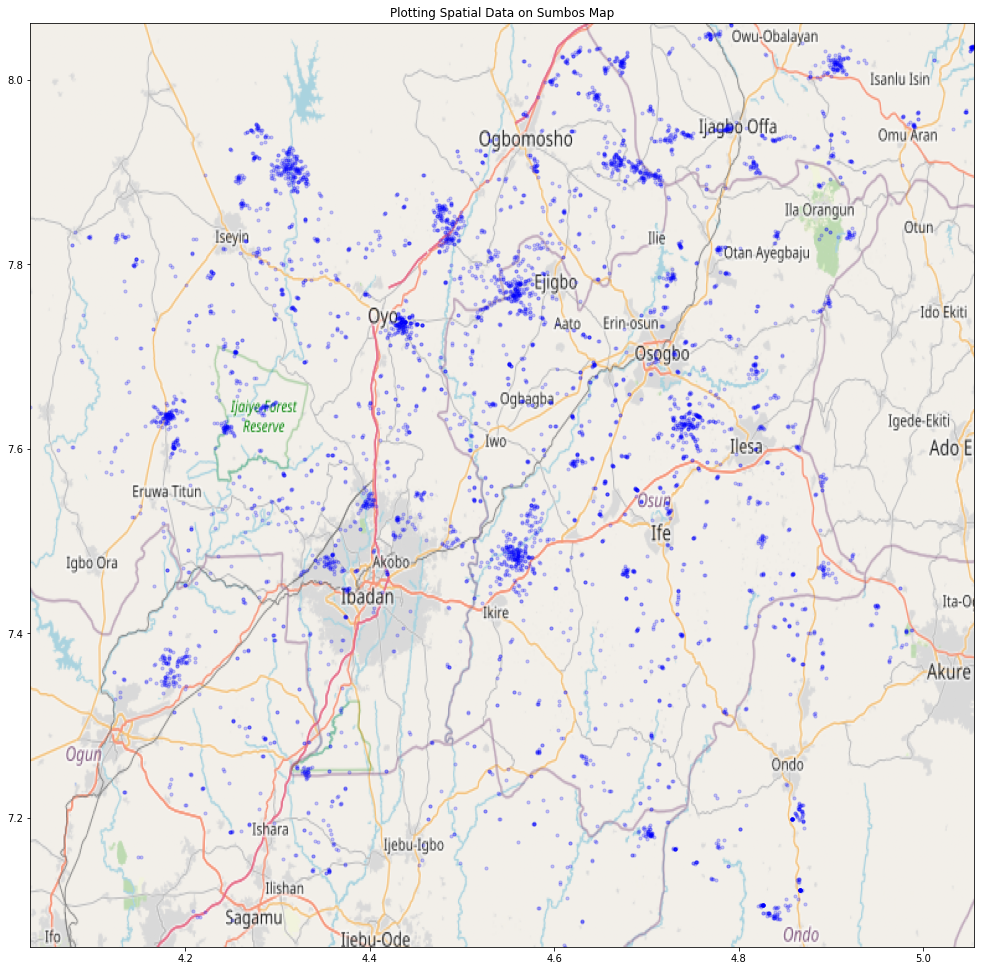

In [14]:
fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(state_osun.longitude, state_osun.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Sumbos Map')
ax.set_xlim(BoundBox[0],BoundBox[1])
ax.set_ylim(BoundBox[2],BoundBox[3])
ax.imshow(ruh, zorder=0, extent = BoundBox, aspect= 'equal')

# Clusters of residential housing

In [15]:
BBox = ((state_osun.resident_longitude.min(),   state_osun.resident_longitude.max(), state_osun.resident_latitude.min(), state_osun.resident_latitude.max()))     
BBox 

(4.037182969770647, 5.062433532393067, 7.061128988016661, 8.066981510813338)

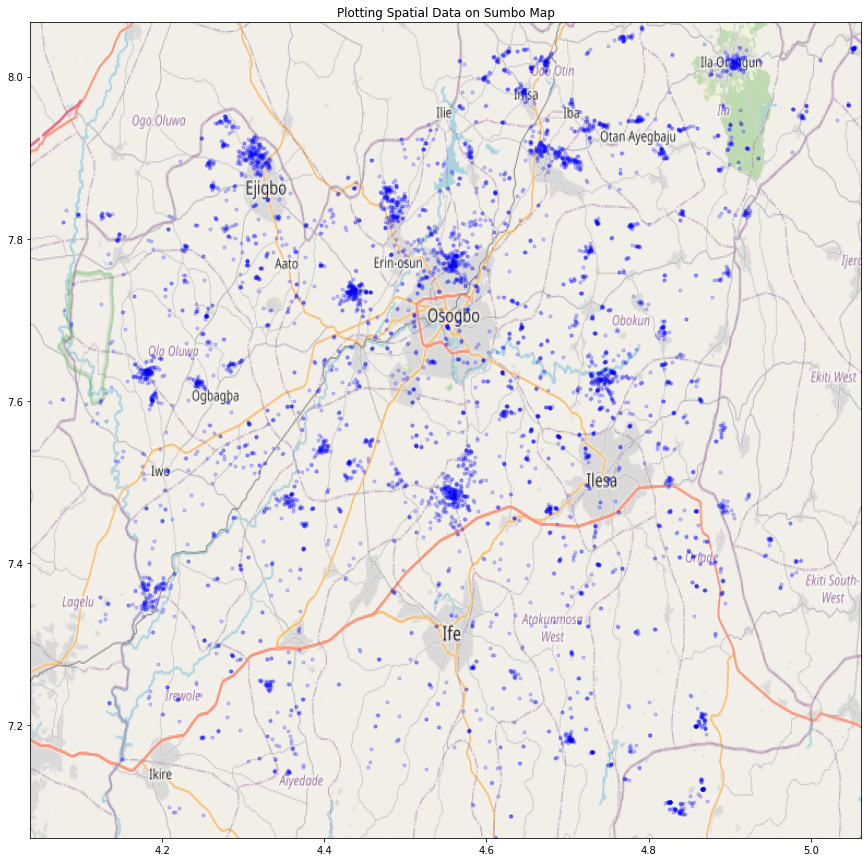

In [16]:
fig, ax = plt.subplots(figsize = (18,15))
ax.scatter(state_osun.longitude, state_osun.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Sumbo Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

# [Graph Folium](https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/) Folium Applied

In [17]:
import numpy as np
import pandas as pd
# For plotting maps
import folium

# For Regular Expressions
import re
# For working with geographical data
import geopandas
!pip install folium

In [18]:
latlon = state_osun['New Georeferenced Column'].max()
latlon

'POINT (5.0550034 8.0367003)'

In [19]:
df=state_osun[['population','status_id','resident_latitude','resident_longitude','lga']]
df.head()

population status_id  resident_latitude  resident_longitude     lga
0        1788        No           7.602428            4.082705     Iwo
1        2800        No           7.604779            4.087122     Iwo
2        2532       Yes           7.829274            4.923936     Ila
3        2225       Yes           7.833372            4.932745     Ila
4        2093       Yes           7.453639            4.984006  Oriade

In [ ]:
df.duplicated().value_counts()

False    5126
dtype: int64

In [ ]:
df.isnull().sum()

population            0
status_id             0
resident_latitude     0
resident_longitude    0
lga                   0
dtype: int64

In [20]:
df2=pd.DataFrame(df.groupby(['lga','status_id'])['population'].max())
df2.reset_index(inplace=True)
df2

lga status_id  population
0   Atakumosa East        No        2814
1   Atakumosa East       Yes        2829
2   Atakumosa West        No        2823
3   Atakumosa West       Yes        2827
4         Ayedaade        No        2808
5         Ayedaade       Yes        2824
6          Ayedire        No        2770
7          Ayedire       Yes        2809
8       Boluwaduro        No        2825
9       Boluwaduro       Yes        2684
10          Boripe        No        2809
11          Boripe       Yes        2820
12       Ede North        No        2807
13       Ede North       Yes        2804
14       Ede South        No        2824
15       Ede South       Yes        2825
16        Egbedore        No        2821
17        Egbedore       Yes        2824
18          Ejigbo        No        2825
19          Ejigbo       Yes        2828
20        Ife East        No        2586
21        Ife East       Yes        2791
22       Ife North        No        2818
23       Ife North       Yes        2823
24       Ife South        No        2829
25       Ife South       Yes        2823
26      IfeCentral        No        2726
27      IfeCentral       Yes        2744
28         Ifedayo        No        2829
29         Ifedayo       Yes        2821
30        Ifelodun        No        2797
31        Ifelodun       Yes        2801
32             Ila        No        2808
33             Ila       Yes        2788
34     Ilesha East        No        2811
35     Ilesha East       Yes        2824
36     Ilesha West        No        2823
37     Ilesha West       Yes        2800
38        Irepodun        No        2812
39        Irepodun       Yes        2812
40         Irewole        No        2829
41         Irewole       Yes        2819
42          Isokan        No        2805
43          Isokan       Yes        2794
44             Iwo        No        2826
45             Iwo       Yes        2818
46          Obokun        No        2796
47          Obokun       Yes        2828
48         Odo0tin        No        2817
49         Odo0tin       Yes        2829
50       Ola-Oluwa        No        2798
51       Ola-Oluwa       Yes        2812
52        Olorunda        No        2825
53        Olorunda       Yes        2806
54          Oriade        No        2814
55          Oriade       Yes        2820
56           Orolu        No        2820
57           Orolu       Yes        2780
58          Osogbo        No        2818
59          Osogbo       Yes        2821

In [21]:
lat_long_list = []
for i in range(1,25):
    temp=[]
    for index, instance in df[df['population'] == i].iterrows():
        temp.append([instance['resident_latitude'],instance['resident_longitude']])
    lat_long_list.append(temp)

In [22]:
from folium.plugins import HeatMapWithTime
from folium.plugins import TimeSliderChoropleth
from branca.element import Figure
fig7=Figure(width=850,height=550)
m7=folium.Map(location=[8.0618986, 	 4.0550034],zoom_start=10)
fig7.add_child(m7)

In [23]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

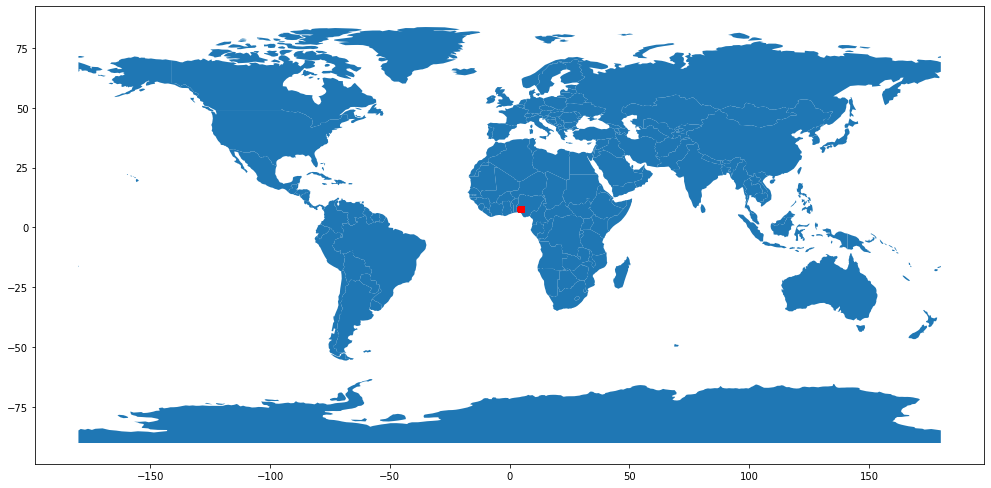

In [24]:
geometry = [Point(xy) for xy in zip(df['resident_longitude'], df['resident_latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(17, 15)), marker='o', color='red', markersize=15);

In [25]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['resident_latitude'], df.resident_latitude))
gdf    

population status_id  ...             lga                 geometry
0           1788        No  ...             Iwo  POINT (7.60243 7.60243)
1           2800        No  ...             Iwo  POINT (7.60478 7.60478)
2           2532       Yes  ...             Ila  POINT (7.82927 7.82927)
3           2225       Yes  ...             Ila  POINT (7.83337 7.83337)
4           2093       Yes  ...          Oriade  POINT (7.45364 7.45364)
...          ...       ...  ...             ...                      ...
5121        2619       Yes  ...  Atakumosa East  POINT (7.20001 7.20001)
5122        2661        No  ...  Atakumosa East  POINT (7.10414 7.10414)
5123        2624        No  ...  Atakumosa East  POINT (7.13508 7.13508)
5124        2197        No  ...  Atakumosa East  POINT (7.23940 7.23940)
5125        1917        No  ...  Atakumosa East  POINT (7.13694 7.13694)

[5126 rows x 6 columns]

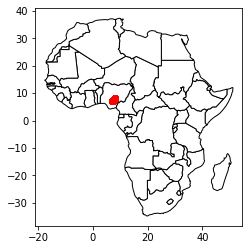

In [26]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

**state geometry**

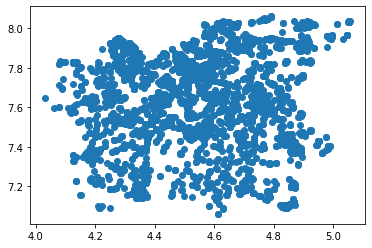

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x=state_osun['longitude'], y=state_osun['latitude'])
plt.show()

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.plot(figsize=(20,20))

**resident geometry**

In [29]:

from shapely.geometry import Point, Polygon
crs={'init':'epsg:4326'}

In [30]:
geometry=[Point(xy) for xy in zip(state_osun["longitude"], state_osun["latitude"])]

In [31]:
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


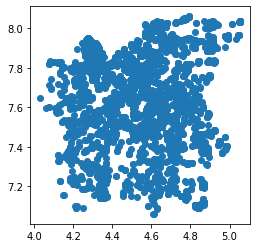

In [32]:
geodata.plot()

Text(38.66259510441817, 0.5, 'Latitude')

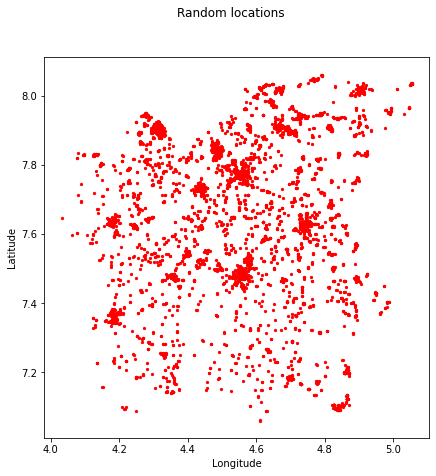

In [33]:
fig, ax = plt.subplots(figsize=(7,7))

#You can use different 'cmaps' such as jet, plasm,magma, infereno,cividis, binary...(I simply chose cividis)


geodata.plot(ax=ax, color='red', markersize=5);



fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

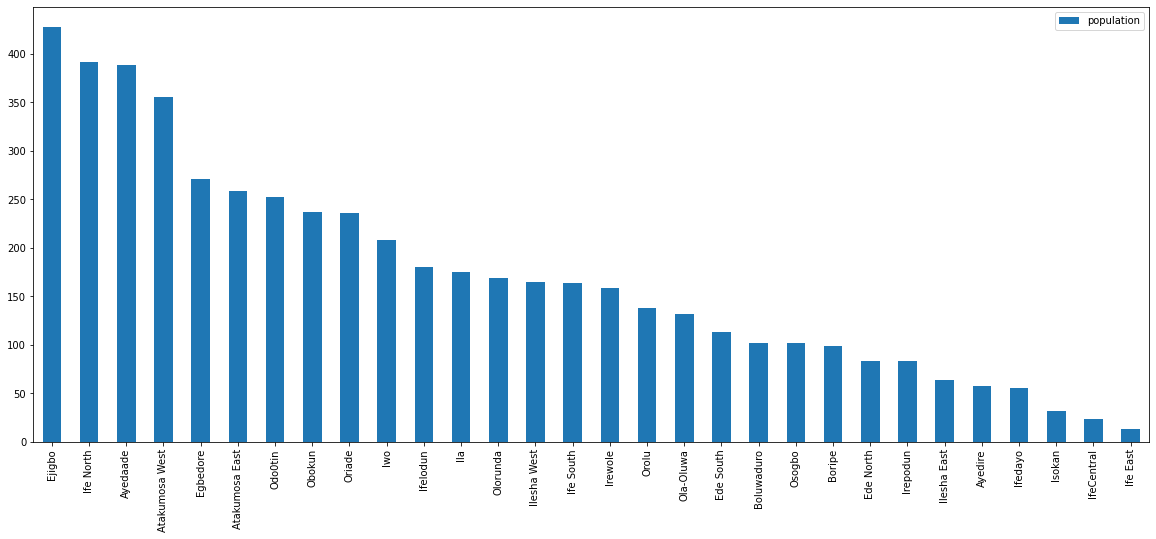

In [36]:
df_countries_pop = state_osun.groupby(by="lga").agg({'population':'count'}).reset_index().sort_values(by='population', ascending=False)
ax = df_countries_pop.plot.bar(x='lga', xlabel = '', figsize=(20,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


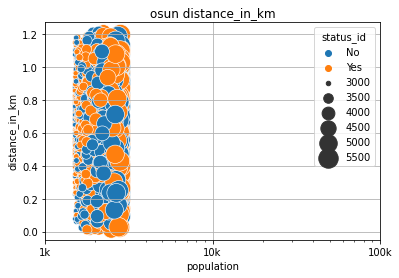

In [10]:
# Store population as a numpy array: np_pop
import seaborn as sns
np_pop = np.array(state_osun.population)
np_pop2 = np_pop*2
#Use seaborn scatterplot for better customization
sns.scatterplot(state_osun['population'], state_osun['distance_in_km'], hue = state_osun['status_id'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('population')
plt.ylabel('distance_in_km')
plt.title('osun distance_in_km')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


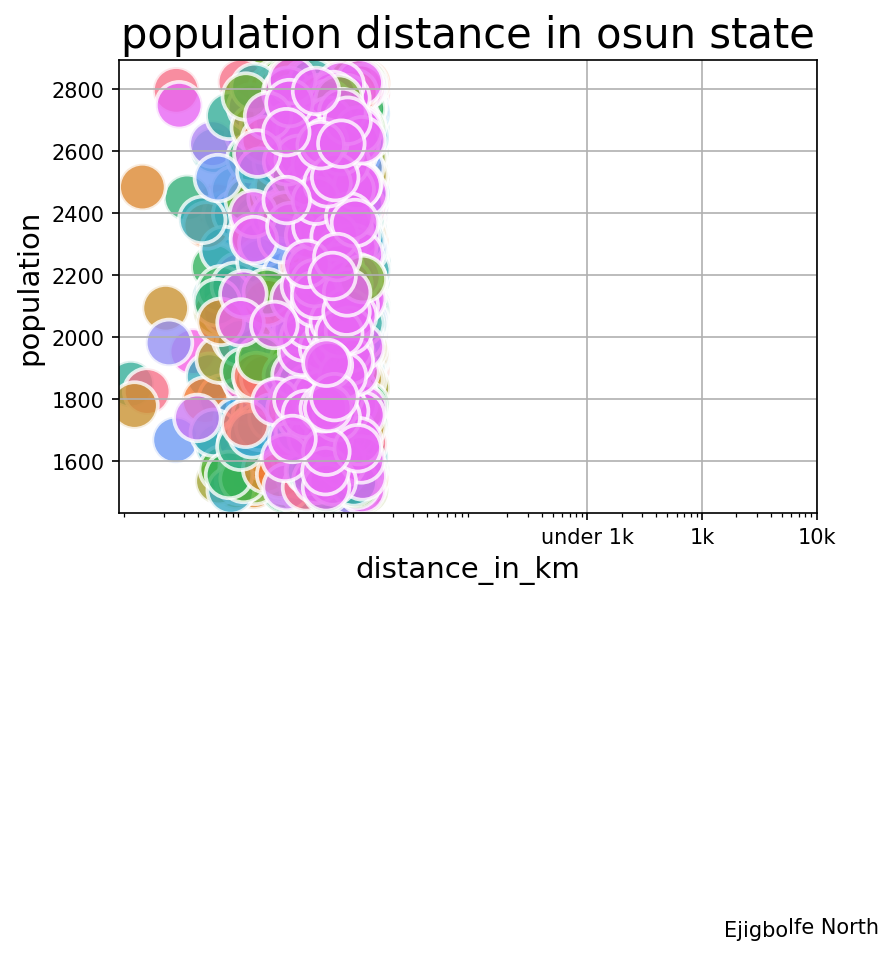

In [15]:
# Increase the graph size
plt.figure(dpi=150)
# Store population as a numpy array: np_pop
np_pop = np.array(state_osun.population)
np_pop2 = np_pop*2
#Let's change the opacity 
sns.scatterplot(state_osun['distance_in_km'], state_osun['population'], hue = state_osun['lga'], legend = False, 
                size=np_pop2, sizes=(500,500), alpha = 0.8)
plt.grid(True)
plt.xscale('log')
plt.xlabel('distance_in_km', fontsize = 14)
plt.ylabel('population', fontsize = 14)
plt.title('population distance in osun state', fontsize = 20)
plt.xticks([100, 1000, 10000],['under 1k', '1k', '10k'])
#Add description to the biggest countries
plt.text(1550, 67, 'Ejigbo')
plt.text(5650, 75, 'Ife North')
plt.show()

In [2]:
!apt-get install -q libgeos-3.5.0

!apt-get install -q libgeos-dev

!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     - 129.7 MB 35 kB/s
ERROR: File "setup.py" not found for legacy project https://github.com/matplotlib/basemap/archive/master.zip.


In [3]:
!pip install -q pyproj==2.2.0
!pip install basemap

[(!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1")] (https://github.com/matplotlib/basemap/issues/525)

In [5]:
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [41]:
!pip install basemap-data-hires

     |████████████████████████████████| 91.1 MB 66 kB/s 


**water presence in osun[wa](https://walker-data.com/geog30323/slides/geographic/#/17)**

In [16]:
import geopandas as gp

sbgeo = gp.GeoDataFrame(state_osun,
                        geometry = gp.points_from_xy(state_osun.longitude,
                                                     state_osun.latitude),
                        crs = 4326)

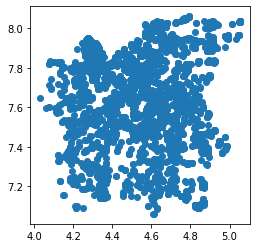

In [17]:
sbgeo.plot()

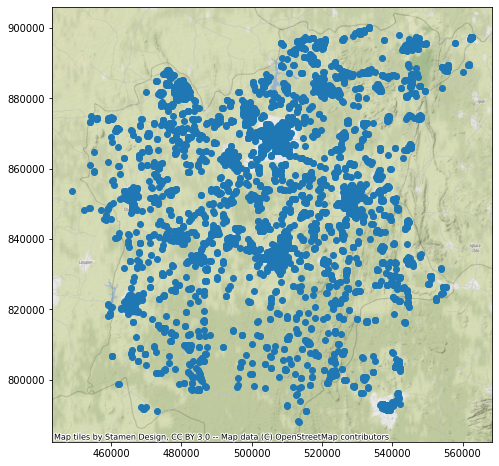

In [18]:

# contextily: package for adding basemaps to plots
# Must be installed first
!pip install --upgrade contextily
# Then, import the package in a new cell
import contextily as cx

# "Project" to Web Mercator, used by tiled mapping services
sbgeo2 = sbgeo.to_crs(3857)

# Assign the Starbucks map to a variable, then add the basemap to it
p = sbgeo2.plot(figsize = (8, 8))
cx.add_basemap(p, zoom = 11)



**residential housing plot**

In [19]:
osgeo = gp.GeoDataFrame(state_osun,
                        geometry = gp.points_from_xy(state_osun.resident_longitude,
                                                     state_osun.resident_latitude),
                        crs = 4326)

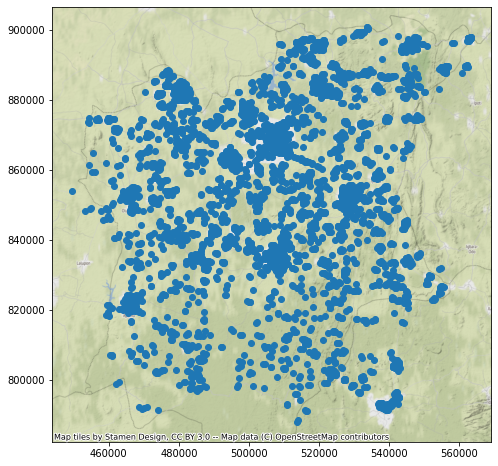

In [21]:
# "Project" to Web Mercator, used by tiled mapping services
osgeo2 = osgeo.to_crs(3857)

# Assign the Starbucks map to a variable, then add the basemap to it
po = osgeo2.plot(figsize = (8, 8))
cx.add_basemap(po, zoom = 11)

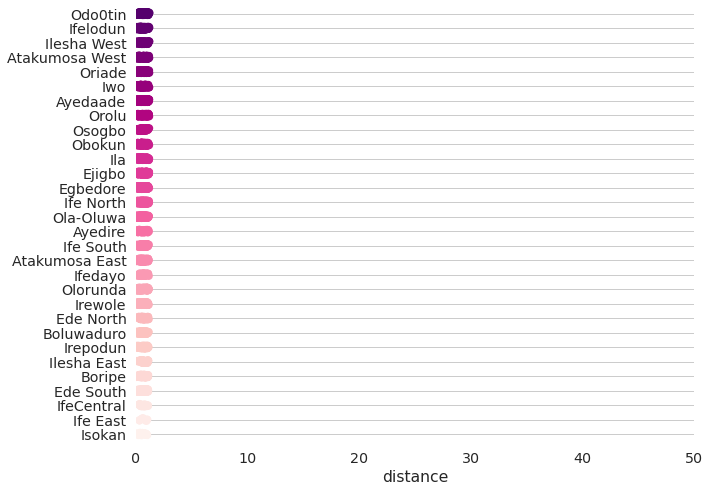

In [31]:
sns.set(style="whitegrid", font_scale = 1.3)

plt.figure(figsize = (10, 8))

p = sns.stripplot(data = state_osun.sort_values('distance_in_km', ascending = False), 
                  x = 'distance_in_km', y = 'lga', palette = "RdPu_r", orient = 'h', size = 8)
                  
p.set(xlabel = "distance", 
      xlim = (0, 50), ylabel = "")
p.axes.xaxis.grid(False)
p.axes.yaxis.grid(True)
sns.despine(left = True, bottom = True)

In [14]:
# Extract the data we're interested in
lat = state_osun['latitude'].values
lon = state_osun['longitude'].values
population = state_osun['population'].values
area = state_osun['distance_in_km'].values

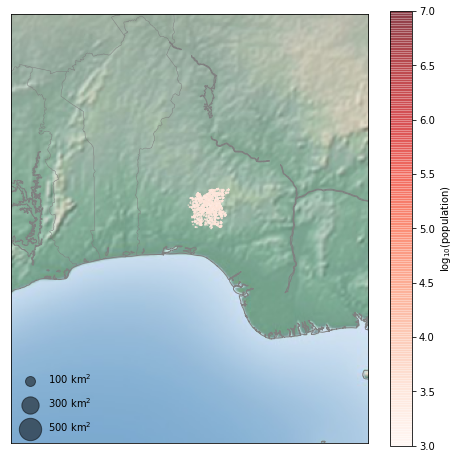

In [16]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=7.0618986, 	 lon_0= 4.0550034, width=1E6, height=1.2E6)
 
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');